In [9]:
import os
import numpy as np
from matplotlib_surface_plotting import plot_surf
from gene_viz.utils import get_data_path, load_mesh_geometry, get_michack_data_path



In [16]:
# Load in cortical meshes

cortical_mesh_file_path = os.path.join(get_data_path(),'fs_LR.32k.L.pial.surf.gii')
mesh_cortex = load_mesh_geometry(cortical_mesh_file_path)
overlay_cortex = np.ones(len(mesh_cortex['coords']))

In [38]:
# Load in cerebellum meshes

cerebellum_mesh_file_path = os.path.join(get_data_path(),'Left-Cerebellum-Cortex_meshfile.ply')
mesh_cerebellum = load_mesh_geometry(cerebellum_mesh_file_path)
overlay_cerebellum = np.ones(len(mesh_cerebellum['coords']))*2

In [18]:
# concatenate vertices and faces

vertices = np.vstack([mesh_cortex['coords'], mesh_cerebellum['coords']])
faces = np.vstack([mesh_cortex['faces'], mesh_cerebellum['faces']+len(mesh_cortex['coords'])])
overlay = np.hstack([overlay_cortex, overlay_cerebellum])


In [34]:
mesh_cerebellum['coords'].min(axis=0)

array([44.138, 17.608,  5.533])

In [35]:
mesh_cortex['coords'].min(axis=0)

array([ -67.65436, -103.50433,  -47.5277 ], dtype=float32)

In [36]:
vertices.min(axis=0)

array([ -67.65435791, -103.5043335 ,  -47.52769852])

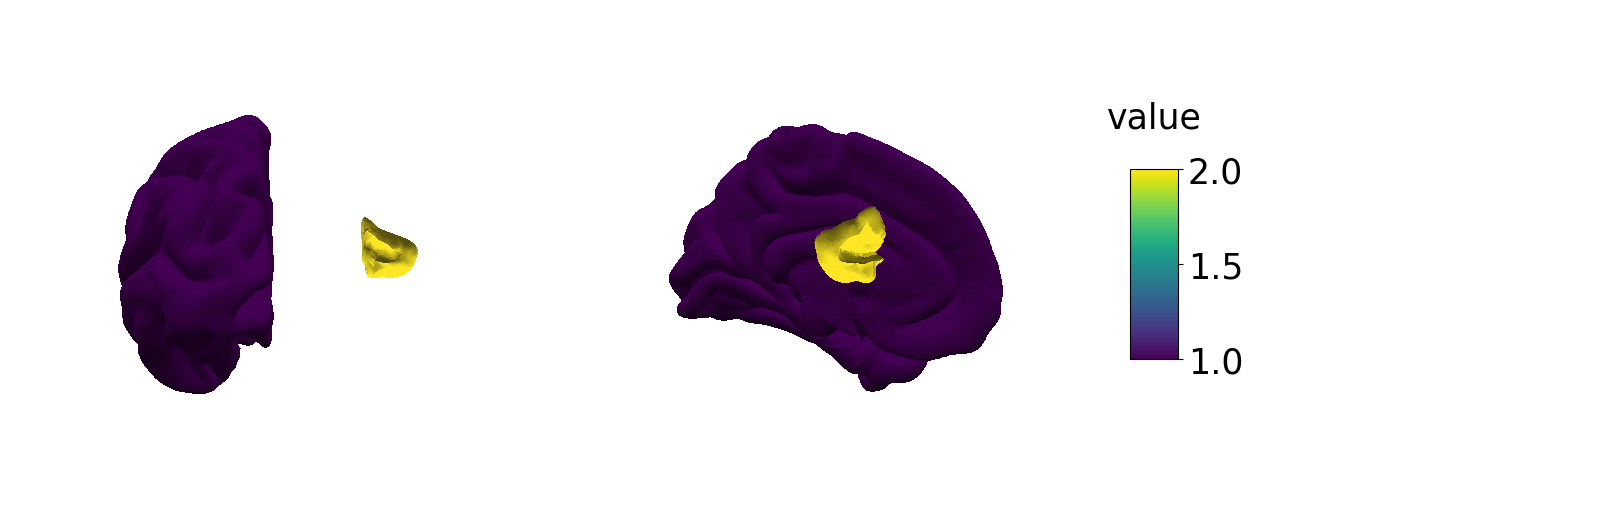

In [30]:
# plot 

plot_surf(vertices, faces, overlay,
          rotate=[0,240]
           )